# Percpetron

###### (Artificial Neuron)
- A perceptron is a single layer neural network
- It acts as a Linear Classifier, Binary Classification
- Loss Function : Binary Cross Entropy (-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent


In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [47]:
#X,Y = make_blobs(n_samples = 500, n_features = 2, centers =2, random_state = 42)
X,Y = make_moons(n_samples = 500, shuffle = True, noise = 0.1, random_state = 42)
Y = Y.reshape((Y.shape[0],1))
print(X.shape,Y.shape)

(500, 2) (500, 1)


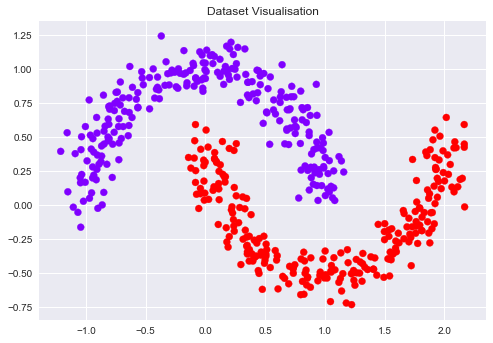

In [48]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y[:,0],cmap=plt.cm.rainbow)
plt.title("Dataset Visualisation")
plt.show()

## Model and Helper Functions 

In [33]:
# Sigmoid function

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

## Implementing the Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the Predictions

In [40]:
def predict(X,weights):
    ''' X -> m*(n+1) matrix, w ->(n+1)*1 vector '''
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """ Binary Cross entropy """
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    ''' Perform weight updates for 1 epoch '''
    Y_ = predict(X,weights)
    dw = np.dot(X.T,(Y_ - Y))

    m = X.shape[0]
    weights -= learning_rate * dw/m
    return weights

def train(X,Y,learning_rate=0.5,epochs=100):
    ''' Train the model on the data '''
    ## Modify input to handle bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Init the weights to zero
    weights = np.zeros((X.shape[1],1))
    
    # Iterate over all epochs
    
    for epoch in range(epochs):
        weights = update(X,Y,weights,learning_rate)
        
        if (epoch%10 == 0):
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [49]:
weights = train(X,Y,learning_rate=0.8,epochs=1000)

Epoch 0 Loss 0.6186
Epoch 10 Loss 0.3902
Epoch 20 Loss 0.3391
Epoch 30 Loss 0.3150
Epoch 40 Loss 0.3001
Epoch 50 Loss 0.2898
Epoch 60 Loss 0.2821
Epoch 70 Loss 0.2762
Epoch 80 Loss 0.2716
Epoch 90 Loss 0.2678
Epoch 100 Loss 0.2648
Epoch 110 Loss 0.2622
Epoch 120 Loss 0.2601
Epoch 130 Loss 0.2584
Epoch 140 Loss 0.2569
Epoch 150 Loss 0.2556
Epoch 160 Loss 0.2545
Epoch 170 Loss 0.2535
Epoch 180 Loss 0.2527
Epoch 190 Loss 0.2520
Epoch 200 Loss 0.2513
Epoch 210 Loss 0.2508
Epoch 220 Loss 0.2503
Epoch 230 Loss 0.2499
Epoch 240 Loss 0.2495
Epoch 250 Loss 0.2491
Epoch 260 Loss 0.2488
Epoch 270 Loss 0.2486
Epoch 280 Loss 0.2483
Epoch 290 Loss 0.2481
Epoch 300 Loss 0.2479
Epoch 310 Loss 0.2477
Epoch 320 Loss 0.2476
Epoch 330 Loss 0.2474
Epoch 340 Loss 0.2473
Epoch 350 Loss 0.2472
Epoch 360 Loss 0.2471
Epoch 370 Loss 0.2470
Epoch 380 Loss 0.2469
Epoch 390 Loss 0.2468
Epoch 400 Loss 0.2467
Epoch 410 Loss 0.2466
Epoch 420 Loss 0.2466
Epoch 430 Loss 0.2465
Epoch 440 Loss 0.2465
Epoch 450 Loss 0.2464

### Perceptron Impelmentation part 2
- Make Predictions
- Visualise the decision surface
- Linear vs Non Linear Classification

In [42]:
def getPredictions(X_Test,weights,labels=True):
    if (X_Test.shape[1] != weights.shape[0]):
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs >= 0.5] = 1
        return labels

In [50]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

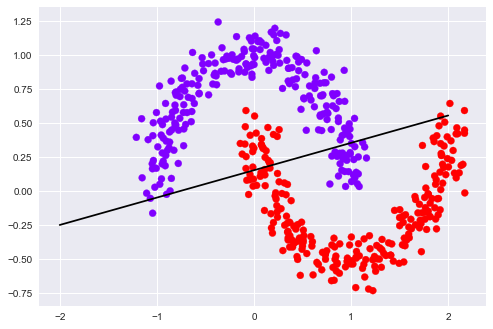

In [51]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],cmap= plt.cm.rainbow)
plt.plot(x1,x2,c='black')
plt.show()


In [52]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y == Y_)/Y.shape[0]
print(training_acc)

0.872


In [56]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :\n",confusion_matrix(Y, Y_))

Confusion Matrix :
 [[217  33]
 [ 31 219]]


### Conclusion
- Percpetron cam only classify linearly seperable data
- For classifying non linear data we need to use Multi_Layer Perceptron